<a href="https://colab.research.google.com/github/thembani47/Natural-Language-Processing-with-Disaster-Tweets/blob/main/Climate_Change_Beliefs_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Predict: Climate Change Classification
© Explore Data Science Academy

### Honour Code
I {**TEAM CW5**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

### Climate Change Project Description
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

### Problem statement
Build a robust Machine Learning Model that will be able to predict a person’s belief in Climate Change based on their Tweet Data, allowing companies to gain access into customer sentiment

<img src="https://github.com/Classification-Team-CW5/Classification-Data/blob/main/climate.jpg?raw=true" width=90%/> 

<a id="cont"></a>
## Table of Contents
<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. References</a>


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

We going to import all the python libraries that we will use in the notebook

In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

# Libraries for data preparation
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
import emoji
# Libraries for model building
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.sparse
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

#Mute warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<a id="two"></a>
## 2. Loading the data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Read a CSV file into a dataframe
The pandas read_csv () function is used to read a CSV file into a dataframe. It comes with a number of different parameters to customize how you’d like to read the file. The following is the general syntax for loading a csv file to a dataframe: Here, path_to_file is the path to the CSV file you want to load.

In [ ]:
# Load train and test datasets
train = pd.read_csv("https://raw.githubusercontent.com/Classification-Team-CW5/Classification-Data/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Classification-Team-CW5/Classification-Data/main/test_with_no_labels.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

This is the first step in EDA, we need to understand the variables in the data set, like what are the input variables and what are the output variables? Then we need to understand the type of the variables in the data set, like is it Integer? A float value? Or a String value? Lastly we need to analyze if the variables are continuous or categorical. Gender is an example of categorical variable while height is an example of continuous variable

#### Pandas head() Function
You can use the **head()** function to view the first n rows of a pandas DataFrame.
By default, the **head()** function displays the first five rows of a DataFrame.

In [ ]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


The **shape** property returns a tuple containing the shape of the DataFrame.

The shape is the number of rows and columns of the DataFrame

In [ ]:
# Shape of the dataset
test.shape

(10546, 2)

From the analysis we find that there are a total of 10546 rows and 2 columns.

In [ ]:
# Shape of the dataset
train.shape

(15819, 3)

From the analysis we find that there are a total of 15819 rows and 3 columns.

The **info()** method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
# dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


As it can be seen, the dataframe has two numeric columns (int64) and one categorical column (object).

And it can also be seen that the dataframe has no null/missing values

## Looking at the numbers of possible classes in our sentiment

In [ ]:
train['sentiment'].unique()

array([ 1,  2,  0, -1])

Class Description
- 2 News: the tweet links to factual news about climate change
- 1 Pro: the tweet supports the belief of man-made climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti: the tweet does not believe in man-made climate change

In [ ]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

We are going to calculate the number of tweets per Sentiment, and we then plot the class distributions results

Text(0.5, 0, 'Tweet Categories')

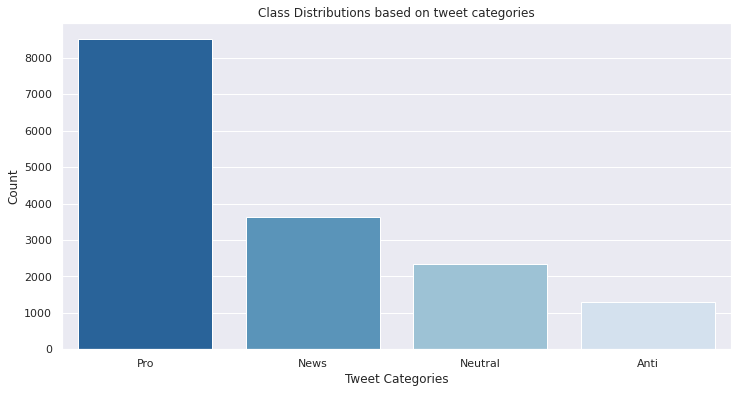

In [ ]:
 plt.figure (figsize= (12,6))
# Number of tweets per sentiment
class_distribution = pd.DataFrame(list(train['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])
sns.set()
sns.barplot(x=class_distribution.index, y=class_distribution.Count, 
           palette="Blues_r")
plt.title('Class Distributions based on tweet categories')
plt.xlabel('Tweet Categories')

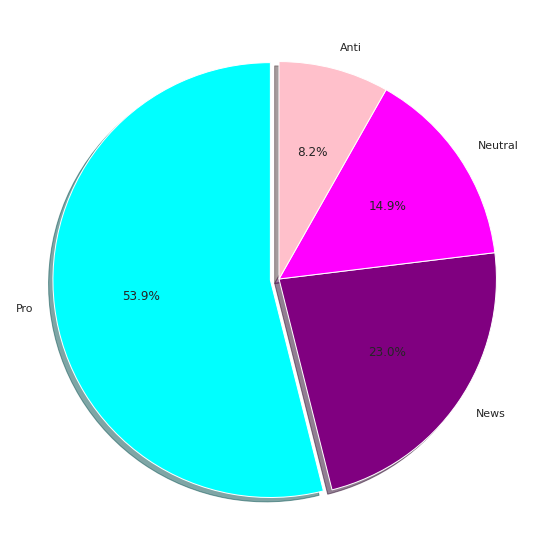

In [ ]:
plt.figure (figsize= (16,10))
values = train['sentiment'].value_counts()/train.shape[0]
labels = (train['sentiment'].value_counts()/train.shape[0]).index
colors = ['cyan', 'purple', 'magenta', 'pink']
plt.pie(x=values, labels=['Pro', 'News', 'Neutral', 'Anti'], autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors,shadow=True)
plt.show()

### There is imbalanced classes in the dataset

Imbalanced classes put “accuracy” out of business. This is a surprisingly common problem in machine learning (specifically in classification), occurring in datasets with a disproportionate ratio of observations in each class.

Standard accuracy no longer reliably measures performance, which makes model training much trickier.

### How much class is imbalanced?
Two factors **balance_accuracy_score** and **accuracy_score are** to be considered to know how much the class is imbalanced.

balanced_accuracy_score computes balanced accuracy and it is used to deal with an imbalanced dataset for both binary or multiclass classification problems. It is defined as the average of recall obtained in each class.

Whereas the accuracy score is the accuracy classification score. The difference between these two accuracy scores will be zero for the balanced dataset. That is for a balanced dataset the balanced_accuracy_score becomes equivalent to the accuracy_score.
<img src="https://github.com/Classification-Team-CW5/Classification-Data/blob/main/imbalance.png?raw=true" width=90%/> 


In [ ]:
# check for duplicated data
len(train[train.duplicated()])

0

#### Wordcloud ☁

Creating a word cloud to visualizate tweet keywords and text data. This is to highlight popular or trending terms based on frequency of use and prominence. The larger the word in the visual the more common the word is on tweet messages.

In [ ]:
#We creating a Collection of written text of each sentiment class

news_tweets = ' '.join([text for text in train['message']
                        [train['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in train['message']
                       [train['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in train['message']
                           [train['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in train['message']
                        [train['sentiment'] == -1]])

tweet_list = [news_tweets, pro_tweets,neutral_tweets, anti_tweets]
# Visualising sentiment class 
full_title = ['Popular words for News tweets',
              'Popular words for Pro tweets',
              'Popular words for Neutral tweets',
              'Popular words for Anti tweets']

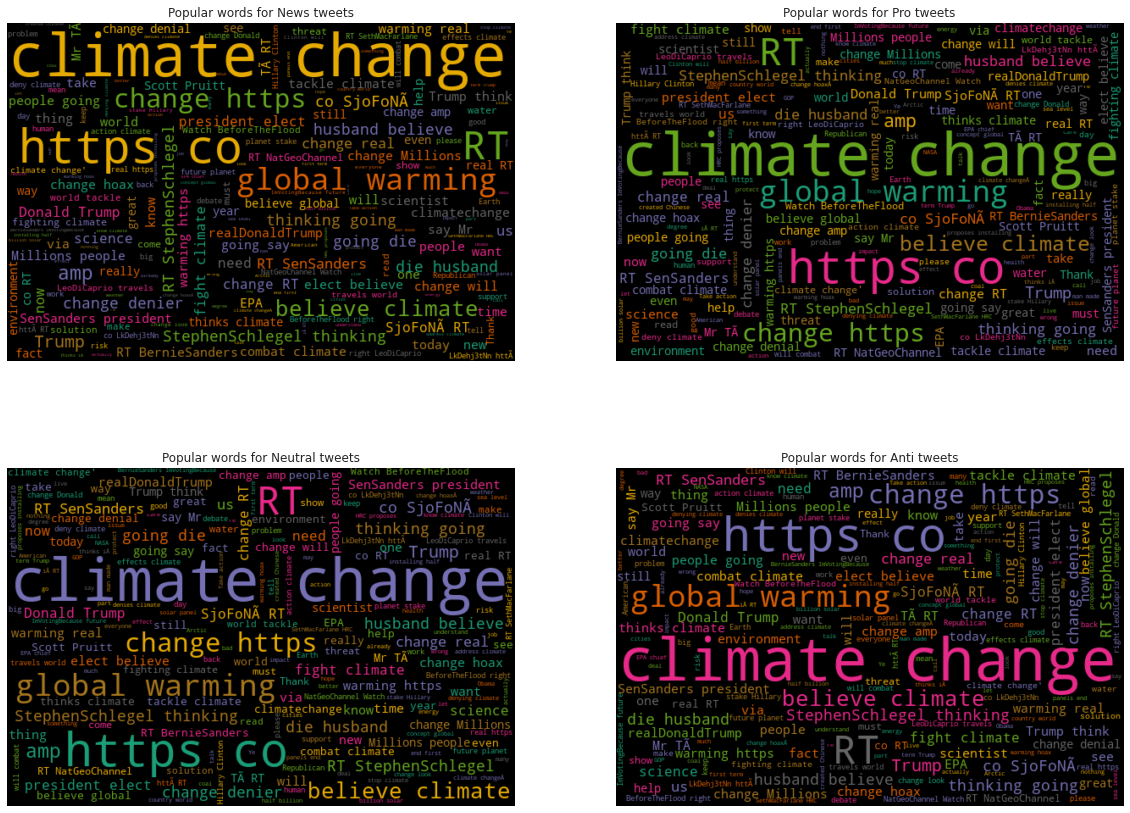

In [ ]:
# Create word clouds of the most common words in each sentiment class
wc = WordCloud(width=600, height=400, background_color='black', colormap='Dark2',
               max_font_size=150, random_state=42)
plt.rcParams['figure.figsize'] = [20, 15]
# Create subplots 
for i in range(0, len(tweet_list)):
    wc.generate(tweet_list[1])
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i]) 
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

## Text Cleaning

Display some tweets that will help us understand what to do when we are trying to clean the messages that we have in the dataset.

In [ ]:
for x in train['message'][30:150]:
    print(x)

@Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice
RT @Honey17011: A guide to global warming, Paris pact and the US role #DemForce #TheResistance #UniteBlue https://t.co/RYiBLwAJZ4
RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…
Denying climate change ignores basic science
BGR ~ China practically says Trump lied about climate change https://t.co/Rz37HtcS8d
RT @BernieSanders: #ImVotingBecause the future of the planet is at stake. Hillary Clinton will combat climate change. Donald Trump thinks iÃ¢â‚¬Â¦
RT @Independent: Trump's team removed climate change data from the White House website. They may be breaking the law…
RT @DeboraheHart: Toxic soils, aquifers, vast amts of wasted (+ waste) water, runaway climate change - what part of gas fracking don'…
RT @BettyBowers: America: Where climate change is “unproven” to people 100% sure a guy called Noah fit all the w

From the tweets it can be seen that the messages have characters like <font color='red'>Emojis</font> (🤪), since <font color='red'>Emojis</font> (🧘) are a new way to express something humans have known for a long time: symbols have power that goes beyond words. As we put it when we unveiled hearts on Twitter, “The heart… is a universal symbol that resonates across languages, cultures, and time zone..

### A function to clean our text column

In [ ]:
# Define a cleaning function to clean the Tweets
def clean_tweets(text):
    text = re.sub(r'@[A-Za-z0-9_]+','',text) # Removing @mentions or usernames
    text = re.sub(r'#','',text) # Removing #tag symbol
    text = re.sub(r'RT[\s]+',' ',text) # Remvoing RT (Retweet)
    text = re.sub(r'https?:\/\/\S+','web-url',text) # Removing hyperlinks
    text = re.sub(r' +',' ',text) # Removing extra whitespaces
    return text

#### A function to change emojis into words

In [ ]:
# Define a function to remove emojis
def change_emoji(tweet):
    tweet = re.sub(r':', ' ', emoji.demojize(tweet)) # Turn emojis into words
    return tweet

### Apply clean_tweets and change_emoji functions to the dataframe

In [ ]:
train['message'] = train['message'].apply(clean_tweets) # Applying function clean tweets to the dataset
train['message'] = train['message'].apply(change_emoji) # Applying function to remove emojis to the dataset
train['message'] = train.message.str.lower() # Making all texts to lower case
train['message'] = train['message'].str.strip() # Removing leading and trailing whitespaces

test['message'] = test['message'].apply(clean_tweets) # Applying function clean tweets to the dataset
test['message'] = test['message'].apply(change_emoji) # Applying function to remove emojis to the dataset
test['message'] = test.message.str.lower() # Making all texts to lower case
test['message'] = test['message'].str.strip() # Removing leading and trailing whitespaces

In [ ]:
# Creating a df that is copy of the train set.
df = train.copy()
# Creating a df1 that is copy of the test set.
df1 = test.copy()

#### Removing punctuation

In [ ]:
# Define a function to remove punctuation
string.punctuation
punctuations_list = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

df['message'] = df['message'].apply(lambda x: cleaning_punctuations(x))
df1['message'] = df1['message'].apply(lambda x: cleaning_punctuations(x))

#### Tokenize

A package provided by NLTK module to achieve the process of tokenization. Splitting the sentence into words or creating a list of words from a string is an essential part of every text processing activity.

In [ ]:
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['message'].apply(tokeniser.tokenize)
df1['tokens'] = df1['message'].apply(tokeniser.tokenize)

Check our resulting tokens

In [ ]:
df1['tokens'].iloc[9555]

['maybe',
 'climate',
 'change',
 'is',
 'just',
 'the',
 'earths',
 'immune',
 'response',
 'to',
 'us']

#### Snowball Stemmer

**Stemming:** It is the process of reducing the word to its word stem that affixes to suffixes and prefixes or to roots of words known as a lemma. In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem. For example – The words care, cared and caring lie under the same stem ‘care’. Stemming is important in natural language processing(NLP).

**Snowball Stemmer:** It is a stemming algorithm which is also known as the Porter2 stemming algorithm as it is a better version of the Porter Stemmer since some issues of it were fixed in this stemmer.

In [ ]:
stemmer = SnowballStemmer('english')
def df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [ ]:
# Apply the stemmer function
df['stem'] = df['tokens'].apply(df_stemmer, args=(stemmer, ))
df1['stem'] = df1['tokens'].apply(df_stemmer, args=(stemmer, ))

Let's look at our stemmer

In [ ]:
for i, t in enumerate(df.iloc[8702]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df.iloc[8702]['stem'][i]))

global               --> global    
warming              --> warm      
i                    --> i         
tell                 --> tell      
you                  --> you       


#### Lemmatization

**Lemmatization** is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. **Lemmatization** is similar to **stemming** but it brings context to the words. So it links words with similar meanings to one word. 
Text preprocessing includes both **Stemming** as well as **Lemmatization**. Many times people find these two terms confusing. Some treat these two as the same. Actually, **lemmatization** is preferred over Stemming because lemmatization does morphological analysis of the words.

In [ ]:
lemmatizer = WordNetLemmatizer()
def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

Apply the lemmatization function

  Resource wordnet not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('wordnet')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/wordnet.zip/wordnet/

#### Run the below cell to avoid the above error

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df['lemma'] = df['tokens'].apply(df_lemma, args=(lemmatizer, ))
df1['lemma'] = df1['tokens'].apply(df_lemma, args=(lemmatizer, ))

In [ ]:
for i, t in enumerate(df.iloc[8702]['lemma']):    
    print ('{:20s} --> {:10s}'.format(t, df.iloc[8702]['lemma'][i]))

global               --> global    
warming              --> warming   
i                    --> i         
tell                 --> tell      
you                  --> you       


#### Lets look at how our dataframe looks like

In [ ]:
df.head()

,sentiment,message,tweetid,tokens,stem,lemma
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evidence, of, anthro..."
2,2,researchers say we have three years to act on ...,698562,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act...","[researcher, say, we, have, three, year, to, a..."
3,1,todayinmaker wired 2016 was a pivotal year i...,573736,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[todayinmaker, wired, 2016, wa, a, pivotal, ye..."
4,1,its 2016 and a racist sexist climate change de...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[it, 2016, and, a, racist, sexist, climat, cha...","[it, 2016, and, a, racist, sexist, climate, ch..."


In [ ]:
df1.head()

,message,tweetid,tokens,stem,lemma
0,europe will now be looking to china to make su...,169760,"[europe, will, now, be, looking, to, china, to...","[europ, will, now, be, look, to, china, to, ma...","[europe, will, now, be, looking, to, china, to..."
1,combine this with the polling of staffers re c...,35326,"[combine, this, with, the, polling, of, staffe...","[combin, this, with, the, poll, of, staffer, r...","[combine, this, with, the, polling, of, staffe..."
2,the scary unimpeachable evidence that climate ...,224985,"[the, scary, unimpeachable, evidence, that, cl...","[the, scari, unimpeach, evid, that, climat, ch...","[the, scary, unimpeachable, evidence, that, cl..."
3,putin got to you too jill \ntrump doesnt beli...,476263,"[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, to, you, too, jill, trump, doesnt...","[putin, got, to, you, too, jill, trump, doesnt..."
4,female orgasms cause global warming\nsarcastic...,872928,"[female, orgasms, cause, global, warming, sarc...","[femal, orgasm, caus, global, warm, sarcast, r...","[female, orgasm, cause, global, warming, sarca..."


#### A function to combine the **lemma** tokens to form sentences

In [ ]:
def combine(df):
    df['lemma'] = [' '.join(map(str, l)) for l in df['lemma']]
    return df

In [ ]:
df = combine(df)
df1 = combine(df1)

In [ ]:
test_df = df1.drop(['message','tokens','stem'],axis=1)

In [ ]:
test_df.head()

,tweetid,lemma
0,169760,europe will now be looking to china to make su...
1,35326,combine this with the polling of staffer re cl...
2,224985,the scary unimpeachable evidence that climate ...
3,476263,putin got to you too jill trump doesnt believe...
4,872928,female orgasm cause global warming sarcastic r...


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Training using imbalanced sentiment

In [ ]:
# Splitting data into features and labels
X = df['lemma']
y = df['sentiment']

#### TF-IDF Vectorizer

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In [ ]:
# Convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

#### Models

In [ ]:
%%time
# Creating a list of all the models to train
models = [LogisticRegression(C=10, max_iter=1000, multi_class='multinomial', random_state=42, solver='lbfgs'),
        SVC(C=1, gamma=1, kernel='linear'),
        MultinomialNB(), KNeighborsClassifier(), 
        DecisionTreeClassifier(max_depth=6),
        RandomForestClassifier()]

CPU times: user 136 µs, sys: 0 ns, total: 136 µs
Wall time: 143 µs


In [ ]:
%%time
# Fitting models onto the training data and predicting.
model_f1_scores=[]
for i in range(0, len(models)):
    text_clf = Pipeline([('clf', models[i])])
    text_clf.fit(X_train, y_train)  
    predictions = text_clf.predict(X_test)
    model_f1_scores.append(round(metrics.f1_score(y_test,predictions, average = 'weighted'),3))
    print(models[i])
    print(metrics.confusion_matrix(y_test,predictions))
    print(metrics.classification_report(y_test,predictions))
    print('F1_score: ',round(metrics.f1_score(y_test,predictions, average = 'weighted'),3))
    print('-------------------------------------------------------')

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial',
                   random_state=42)
[[ 100   35  135    8]
 [  12  167  229   17]
 [  11   45 1598  101]
 [   2   10  144  550]]
              precision    recall  f1-score   support

          -1       0.80      0.36      0.50       278
           0       0.65      0.39      0.49       425
           1       0.76      0.91      0.83      1755
           2       0.81      0.78      0.80       706

    accuracy                           0.76      3164
   macro avg       0.76      0.61      0.65      3164
weighted avg       0.76      0.76      0.75      3164

F1_score:  0.746
-------------------------------------------------------
SVC(C=1, gamma=1, kernel='linear')
[[  90   30  150    8]
 [   7  144  256   18]
 [   5   32 1607  111]
 [   1    8  148  549]]
              precision    recall  f1-score   support

          -1       0.87      0.32      0.47       278
           0       0.67      0.34      0.45       425
     

Text(0.5, 0, 'f1 score')

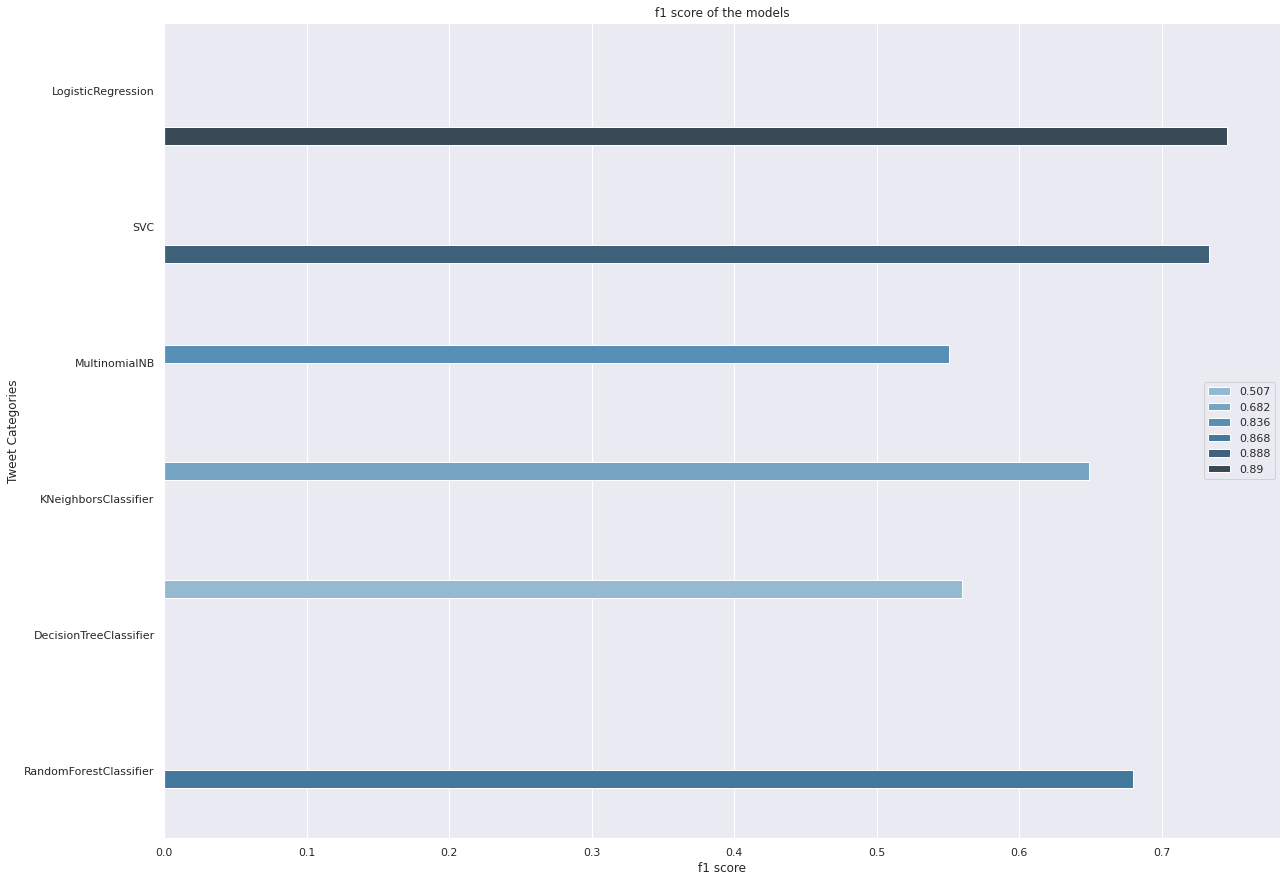

In [ ]:
#Visualizing the f1 scores for the imbalanced data 
sns.barplot(y=["LogisticRegression",
        "SVC",
        "MultinomialNB", "KNeighborsClassifier", 
        "DecisionTreeClassifier",
        "RandomForestClassifier"], x=model_f1_scores, 
           palette="Blues_d",hue=model_f1_scores_balanced,orient="h")
plt.title("f1 score of the models")
plt.ylabel('Tweet Categories')
plt.xlabel("f1 score")

### Handling Imbalanced Classes

In machine learning, **“imbalanced classes”** is a familiar problem particularly occurring in classification when we have datasets with an unequal ratio of data points in each class. Training of model becomes much trickier as typical accuracy is no longer a reliable metric for measuring the performance of the model. Now if the number of data points in minority class is much less, then it may end up being completely ignored during training.

### Resampling
Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

- 1. **Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.

- 2. **Downsampling**: Where you decrease the frequency of the samples, such as from days to months.
In both cases, data must be invented.


In the case of upsampling, care may be needed in determining how the fine-grained observations are calculated using interpolation. In the case of downsampling, care may be needed in selecting the summary statistics used to calculate the new aggregated values.

There are perhaps two main reasons why you may be interested in resampling your time series data:

- 1. **Problem Framing**: Resampling may be required if your data is not available at the same frequency that you want to make predictions.

- 2. **Feature Engineering**: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

<img src="https://github.com/Classification-Team-CW5/Classification-Data/blob/main/resample.png?raw=true" width=60%/> 

In [ ]:
# importing the module and creating a resampling variable
data = train.copy()
class_size = int(len(data[data['sentiment']==1])/2)

In [ ]:
# Seperating the four classes
class_1 = data[data['sentiment']==-1]
class_2 = data[data['sentiment']==0]
class_3 = data[data['sentiment']==1]
class_4 = data[data['sentiment']==2]

In [ ]:
# upsampling classes 1, 2, and 4 & downsampling class 3
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)
class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)
class_3_down = resample(class_3,replace=False,n_samples=class_size, random_state=27)

In [ ]:
# Creating a new DataFrame out of the balanced bata
re_sample_df = pd.concat([class_1_up, class_2_up, class_4_up,class_3_down])

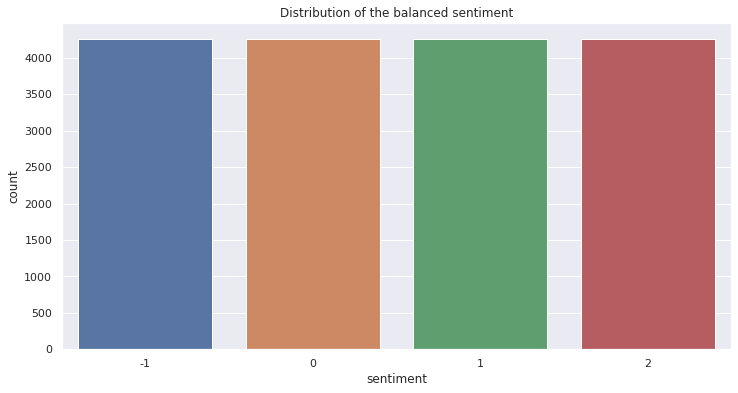

In [ ]:
# Checking if data has been well-balanced
plt.figure (figsize= (12,6))
sns.countplot(x = re_sample_df['sentiment'], data = data)
plt.title('Distribution of the balanced sentiment')
plt.show()

### Training using balanced sentiment

In [ ]:
# Defining the features as well as the label
X1 = re_sample_df['message']
X_re_sample = X1.apply(clean_tweets)
X_re_sample = X1.apply(change_emoji)
X_re_sample = X1.apply(cleaning_punctuations)
y_re_sample = re_sample_df['sentiment']

In [ ]:
# Convert a collection of raw documents to a matrix of TF-IDF features
X_vectorized_re_sample = vectorizer.fit_transform(X_re_sample)

In [ ]:
X_train_re_sample, X_test_re_sample, y_train_re_sample, y_test_re_sample=train_test_split(X_vectorized_re_sample,
                                                                                            y_re_sample,
                                                                                            train_size=0.8,
                                                                                            random_state=42)

In [ ]:
%%time
# Fitting models onto the training data and predicting.
model_f1_scores_balanced=[]
for i in range(0, len(models)):
    text_clf = Pipeline([('clf', models[i])])
    text_clf.fit(X_train_re_sample, y_train_re_sample)  
    predictions = text_clf.predict(X_test_re_sample)
    model_f1_scores_balanced.append(round(metrics.f1_score(y_test_re_sample,predictions, average = 'weighted'),3))
    print(models[i])
    print(metrics.confusion_matrix(y_test_re_sample,predictions))
    print(metrics.classification_report(y_test_re_sample,predictions))
    print('F1_score: ',round(metrics.f1_score(y_test_re_sample,predictions, average = 'weighted'),3))

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial',
                   random_state=42)
[[817  17  13   4]
 [ 14 781  40  26]
 [ 25  81 630  88]
 [  3  15  45 813]]
              precision    recall  f1-score   support

          -1       0.95      0.96      0.96       851
           0       0.87      0.91      0.89       861
           1       0.87      0.76      0.81       824
           2       0.87      0.93      0.90       876

    accuracy                           0.89      3412
   macro avg       0.89      0.89      0.89      3412
weighted avg       0.89      0.89      0.89      3412

F1_score:  0.89
SVC(C=1, gamma=1, kernel='linear')
[[813  18  14   6]
 [  9 765  61  26]
 [ 17  72 645  90]
 [  5  12  49 810]]
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       851
           0       0.88      0.89      0.89       861
           1       0.84      0.78      0.81       824
           2       0.87      0.92      0

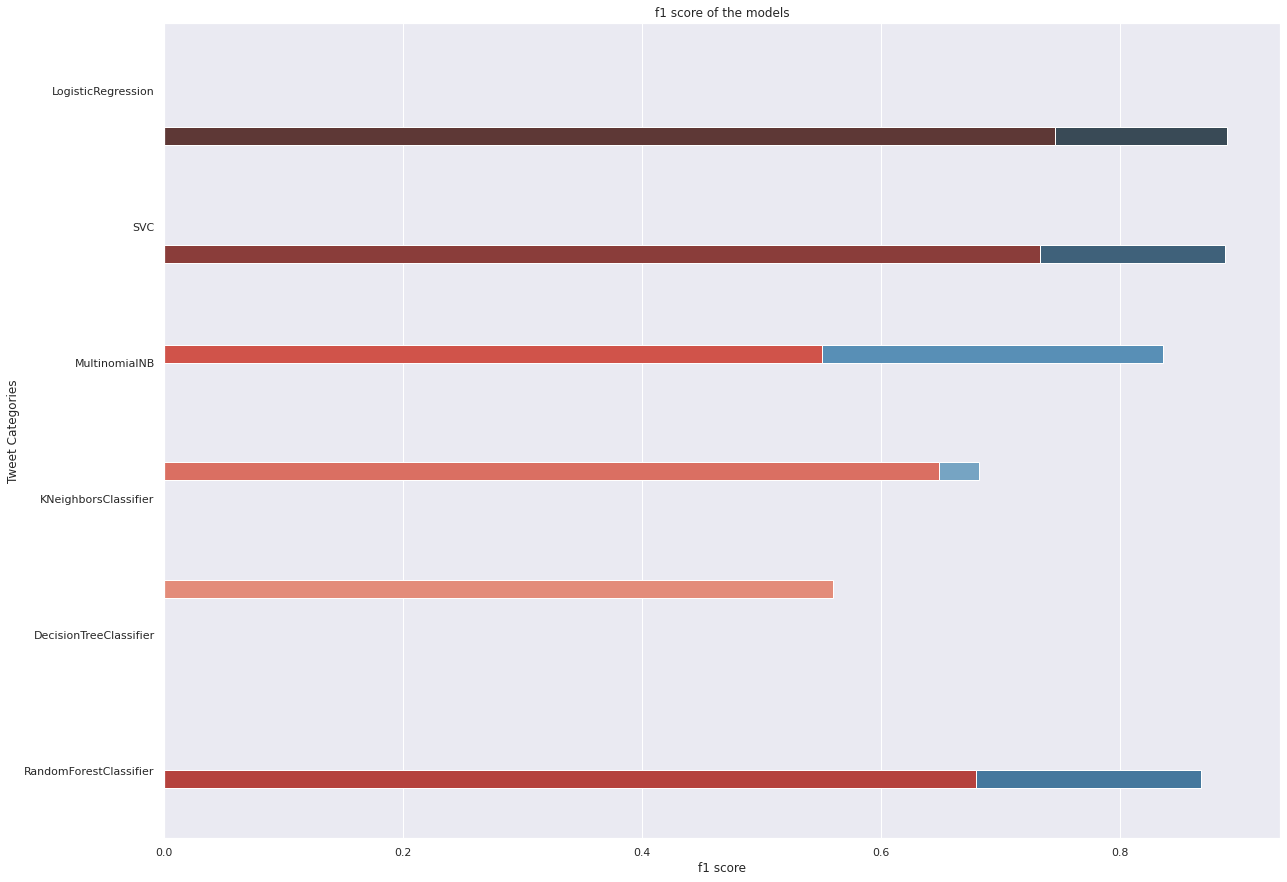

In [ ]:
#Visualizing the f1 scores for the imbalanced data 
#Visualizing the balanced data
sns.barplot(y=["LogisticRegression",
        "SVC",
        "MultinomialNB", "KNeighborsClassifier", 
        "DecisionTreeClassifier",
        "RandomForestClassifier"], x=model_f1_scores_balanced, 
           palette="Blues_d",hue=model_f1_scores_balanced,orient="h")
#Visualizing the imbalanced data
sns.barplot(y=["LogisticRegression",
        "SVC",
        "MultinomialNB", "KNeighborsClassifier", 
        "DecisionTreeClassifier",
        "RandomForestClassifier"], x=model_f1_scores, 
           palette="Reds_d",hue=model_f1_scores_balanced,orient="h")
plt.title("f1 score of the models")
plt.ylabel('Tweet Categories')
plt.xlabel("f1 score")
plt.legend([],[], frameon=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Model Performance after training with imbalanced classes

**Best perfoming models**


With F1 score above 0.7
1.   LogisticRegression() - Logistic Regression
2.   SVC() - Support Vector Machine

With F1 score below 0.7


1.   Decision Tree Classifier
2.   Random Forest Classifier
3.   K Neighbors Classifier
4.   Multinomial NB





##### Model Performance after training with balanced classes


Best perfoming models
Most of the models scored F1_score above 0.80

-LogisticRegression()

-SVC()

-MultinomialNB()

-RandomForestClassifier()

while KNN and DecisonTreeClassifier were 0.682 and 0.507 repectively which is not an improved of the score from models trained with unbalanced data

#### NB:

When we make a submission on Kaggle after balancing the classes, the f1 score is lower than the f1 score when using imbalanced classes

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Model Evaluation
Accuracy is not always the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:

Confusion Matrix: table shows correct predictions and types of incorrect predictions.

Precision: the number of true positives divided by all positive predictions.
Recall: the number of true positives divided by the number of positive values in the test data.

F1: Score: the weighted average of precision and recall.

#### Logistic Regression
Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

#### Math Prerequisites
You’ll need an understanding of the sigmoid function and the natural logarithm function to understand what logistic regression is and how it works.

#### Support Vector Machine
**Support Vector Machine** (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate.

<a id="eight"></a>
## 8. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

1. [Class Imbalance Problem and Ways To Handle It](https://medium.com/nerd-for-tech/class-imbalance-problem-and-ways-to-handle-it-4861a195398a)

2. [Change emoji to words](https://www.youtube.com/watch?v=-2NNe6qiIg8&t=1684s)

3. [Exploratory Data Analysis (EDA)](https://medium.com/geekculture/exploratory-data-analysis-eda-part-1-7eab49cdbd66#:~:text=EDA%20is%20very%20important%20step%20in%20machine%20learning,helps%20to%20improve%20the%20accuracy%20of%20the%20models.)

4. [Resampling](https://mlr.mlr-org.com/articles/tutorial/resample.html)

5. [TF-IDF Vectorizer scikit-learn](https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a)

6. [Support Vector Machine](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/#:~:text=Support%20Vectors%20are%20simply%20the%20coordinates%20of%20individual,and%20a%20few%20examples%20of%20their%20working%20here.)